By **OVIE IBOYITIE**


# Predicting Rock Lithology using Machine Learning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Exploratory Data Analysis</a></li>
<li><a href="#mdd">Model Development</a></li>
<li><a href="#mde">Model Evaluation</a></li>
<li><a href="#conclusions">Report</a></li>
<li><a href="#references">References</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction
The identification of a rock's lithology is fundamental to all reservoir characterization because the physical and chemical properties of the rock that holds hydrocarbons and/or water affect the response of every tool used to measure formation properties. Understanding reservoir lithology is the foundation from which all other petrophysical calculations are made. To make accurate petrophysical calculations of porosity, water saturation (Sw), and permeability, the various lithologies of the reservoir interval must be identified and their implications understood. Lithology means "the composition or type of rock such as sandstone or limestone."

The litholgies in our dataset include
   - Anhydrite
   - Basement
   - Chalk
   - Coal
   - Dolomite
   - Halite
   - Limestone
   - Marl
   - Sandstone
   - Sandstone/Shale
   - Shale
   - Tuff


### Challenges

Obtaining a physical sample of the reservoir is the surest way to unambiguously determine lithology and rock type, but obtaining this physical sample is not always easy. Mud logs are the first choice in wildcat wells, but exact assignment of a rock fragment to a particular depth is not without error. The size of the individual rock sample examined at the surface is rather small because it is limited by the size of drill cuttings and rock strength. Weak rocks, ones without cement, are often reduced to original detrital grain size by the drilling process, making it difficult to determine rock type, but still possible to determine lithology. 

If no direct rock sample is available in a given zone, log responses must be used alone to simultaneously determine lithology


With the recent developments, computing power, and availability of large data, the use of machine learning approach has spurred the interest of the oil and gas industry. Other works has been done to predict lithology using machine learning. This approach uses artificial neural networks and random forest to classify lithology using well logs, location of the well and its depth. 


<a id='wrangling'></a>
## Data Wrangling and Exploratory Data Analysis

### Installing the required libraries

In [1]:
#pip install imblearn --user #For Handling for undersampled classes using Over sampling method

### Installing the required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas_profiling

### Loading the data

In [3]:
df = pd.read_csv("train.csv", delimiter = ';')

In [4]:
df.head(2)

WELL  DEPTH_MD         X_LOC      Y_LOC       Z_LOC         GROUP  \
0  15/9-13   494.528  437641.96875  6470972.5 -469.501831  NORDLAND GP.   
1  15/9-13   494.680  437641.96875  6470972.5 -469.653809  NORDLAND GP.   

  FORMATION       CALI  RSHA     RMED  ...       ROP  DTS  DCAL      DRHO  \
0       NaN  19.480835   NaN  1.61141  ...  34.63641  NaN   NaN -0.574928   
1       NaN  19.468800   NaN  1.61807  ...  34.63641  NaN   NaN -0.570188   

   MUDWEIGHT  RMIC  ROPA  RXO  FORCE_2020_LITHOFACIES_LITHOLOGY  \
0        NaN   NaN   NaN  NaN                             65000   
1        NaN   NaN   NaN  NaN                             65000   

   FORCE_2020_LITHOFACIES_CONFIDENCE  
0                                1.0  
1                                1.0  

[2 rows x 29 columns]

### Data summary and Profile

In [5]:
from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 1170511 │ │ float64     │ 25    │                                                         │
│ │ Number of columns │ 29      │ │ string      │ 3     │                                                         │
│ └───────────────────┴─────────┘ │ int32       │ 1     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA      ┃ NA %  ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ DEPTH_MD             │       0 │     0 │    2200 │   1000 │     140 │    1400 │    2900 │    5400 │ ▃█▇▅▂  │  │
│ │ X_LOC                │   11000 │  0.92 │  490000 │  35000 │  430000 │  450000 │  520000 │  570000 │ ▇██▄▇▁ │  │
│ │ Y_LOC                │   11000 │  0.92 │ 6700000 │ 130000 │ 6400000 │ 6600000 │ 6800000 │ 6900000 │ ▄▁▅▁██ │  │
│ │ Z_LOC                │   11000 │  0.92 │   -2100 │    970 │   -5400 │   -2800 │   -1400 │    -110 │  ▂▅▇█▃ │  │
│ │ CALI                 │   88000 │   7.5 │      13 │    3.8 │     2.3 │     9.4 │      17 │      28 │  ▅█▅▁  │  │
│ │ RSHA                 │  540000 │    46 │      11 │    100 │  0.0001 │    0.85 │     3.1 │    2200 │   █    │  │
│ │ RMED                 │   39000 │   3.3 │       5 │     55 │ -0.0084 │    0.91 │     2.7 │    2000 │   █    │  │
│ │ RDEP                 │   11000 │  0.94 │      11 │    110 │   0.032 │    0.91 │     2.6 │    2000 │   █    │  │
│ │ RHOB                 │  160000 │    14 │     2.3 │   0.25 │    0.72 │     2.1 │     2.5 │     3.5 │   ▃█▂  │  │
│ │ GR                   │       0 │     0 │      71 │     34 │    0.11 │      48 │      89 │    1100 │   █    │  │
│ │ SGR                  │ 1100000 │    94 │      65 │     38 │    -780 │      43 │      88 │     960 │    █▂  │  │
│ │ NPHI                 │  410000 │    35 │    0.33 │   0.13 │  -0.036 │    0.24 │    0.42 │       1 │  ▁▇█▂  │  │
│ │ PEF                  │  500000 │    43 │     6.3 │     11 │     0.1 │     3.4 │       6 │     380 │   █    │  │
│ │ DTC                  │   81000 │   6.9 │     110 │     30 │     7.4 │      88 │     140 │     320 │   █▇   │  │
│ │ SP                   │  310000 │    26 │      60 │     77 │   -1000 │      32 │      83 │     530 │    ▁█  │  │
│ │ BS                   │  490000 │    42 │      12 │    3.3 │       6 │     8.5 │      12 │      26 │  ▆█ ▃  │  │
│ │ ROP                  │  640000 │    54 │     140 │   1500 │   -0.12 │     5.6 │      35 │   47000 │   █    │  │
│ │ DTS                  │ 1000000 │    85 │     200 │     71 │      69 │     160 │     220 │     680 │  ▆█▂▁  │  │
│ │ DCAL                 │  870000 │    74 │     1.2 │     54 │     -12 │    0.15 │     1.3 │   10000 │   █    │  │
│ │ DRHO                 │  180000 │    16 │   0.012 │    7.5 │   -7400 │ -0.0093 │   0.022 │     2.8 │      █ │  │
│ │ MUDWEIGHT            │  850000 │    73 │     1.2 │     10 │    0.13 │    0.14 │     1.2 │     190 │   █    │  │
│ │ RMIC                 │  990000 │    85 │     7.8 │  

### Check for missing values

In [6]:
# WHAT PERCENTAGE OF EACH ATTRIBUTE IS MISSING
missing_values = df.isna().mean()*100
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ["Percentage_of_missing_values"]
columns_high_nulls = list(missing_values.query("Percentage_of_missing_values > 50").index)

Selecting columns with over 50% of missing values, the values cannot be sourced, and using the conventional methods of filling these nulls would create a bias, and would have an adverse effect on our model

In [7]:
# making a copy of the dataframe
data = df.copy()

In [8]:
# Dropping columns with missing values for the depth and location of the well
data.dropna(subset = ["X_LOC"], inplace = True)

In [9]:
# Dropping Columns with missing values greater than 50%
data.drop(columns_high_nulls, axis = "columns", inplace = True)

In [10]:
# Making a copy of the new dataframe
data2 = data.copy()

In [11]:
# Saving names of the columns to Attribues
Attributes = data2.columns.to_list()

In [12]:
# Selecting the columns of numeric data type
Numeric_variables = Attributes[7:-2]

In [13]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [14]:
# Creating a column that contains the lithology of each well at a particular depth and location
data2["Lithology"] = data2.FORCE_2020_LITHOFACIES_LITHOLOGY.map(lithology_keys)

In [107]:
# Defining a function that plots the Kde and box plot of a variable
labels = ['Sandstone','Sandstone/Shale','Shale','Marl','Dolomite','Limestone','Chalk','Halite','Anhydrite','Tuff','Coal','Basement']
def distribution_plots(df,variable, hue = None):
    if hue != None:
        fig, ax = plt.subplots(2,2, figsize=(15,8))
        sns.kdeplot(data=df, x=variable, ax = ax[0,0])
        sns.kdeplot(data=df, x=variable, ax = ax[0,1], hue= hue)
        sns.boxplot(data=df, y=variable, ax = ax[1,0])
        sns.boxplot(data=df,x = hue, y=variable, ax = ax[1,1])
        ax[1,1].set_xticklabels(labels = labels, rotation=90)
        plt.show()
        plt.clf()
        fig.savefig(variable)
    else:
        fig, ax = plt.subplots(1,2, figsize=(15,4))
        sns.kdeplot(data=df, x=variable, ax = ax[0])
        sns.boxplot(data=df, y=variable, ax = ax[1], hue =hue)
        plt.show()
        plt.clf()
        fig.savefig(variable)
    
        

### Checking for outliers

In [16]:
# Defining a function for calculating the upper limit for outliers
def outlier_upper_limit(asdf):
    q = list(asdf.quantile([0.25,0.75]))
    z = q[1] + 1.5 * (q[1]-q[0])
    return z

# Defining a function for calculating the lower limit for outliers
def outlier_lower_limit(asdf):
    q = list(asdf.quantile([0.25,0.75]))
    z = q[0] - 1.5 * (q[1]-q[0])
    return z

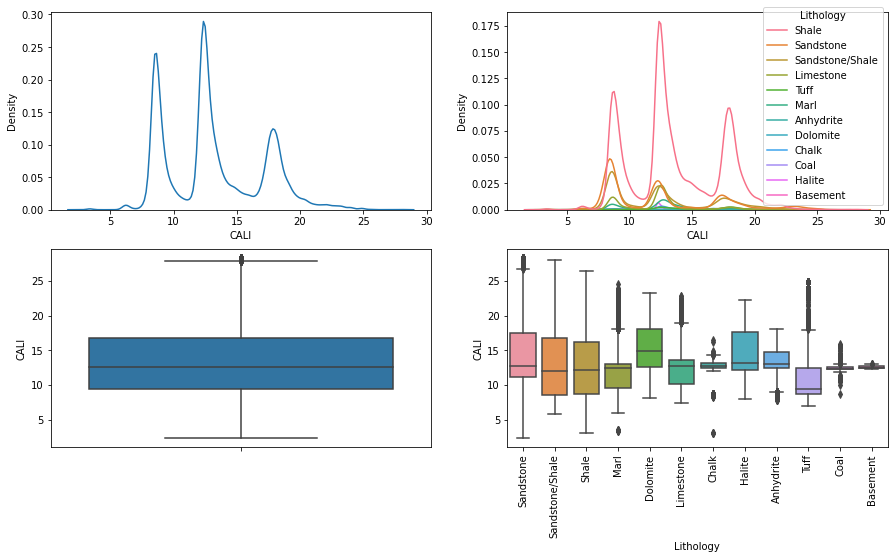

<Figure size 432x288 with 0 Axes>

In [17]:
distribution_plots(data2, Numeric_variables[0], "Lithology")

The distribution of CALI is multimodal and right skewed. The boxplot for CALI shows that there outliers for CALI at the upper end of its distribution. The boxplots of CALI for each class shows that the different classes have different distributions for CALI and some classes like Marl, Chalk, and Coal have outliers on both ends of the their the distributions. Some Classes like Sandstone/Shale, shale, dolomite and Halite do not have outliers for CALI. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


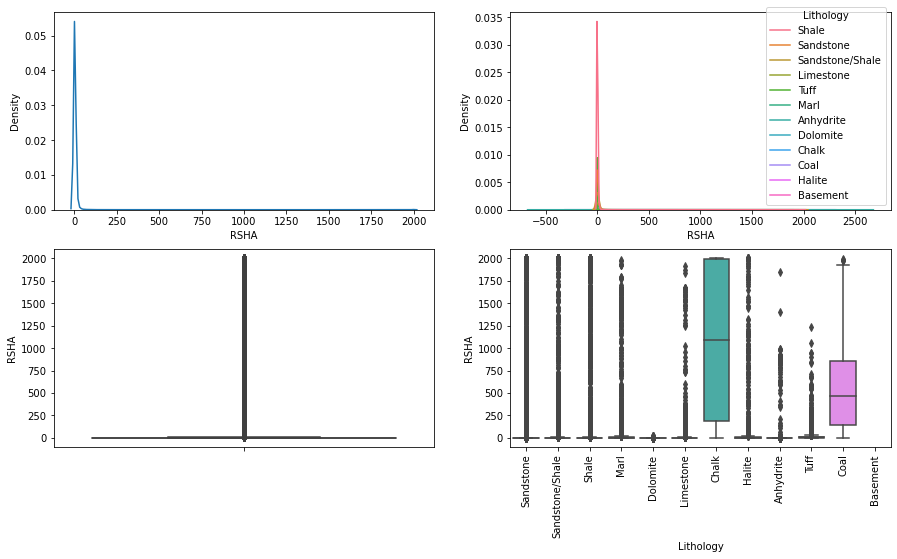

<Figure size 432x288 with 0 Axes>

In [18]:
distribution_plots(data2, Numeric_variables[1], "Lithology")

The data is right skewed with majority of its values detected as outliers. Only the RSHA of two classes (Anhydrite and Halite) do not have its observations or values as outliers. The large variablity of RSHA makes RSHA a bad variable for predicting classes. 

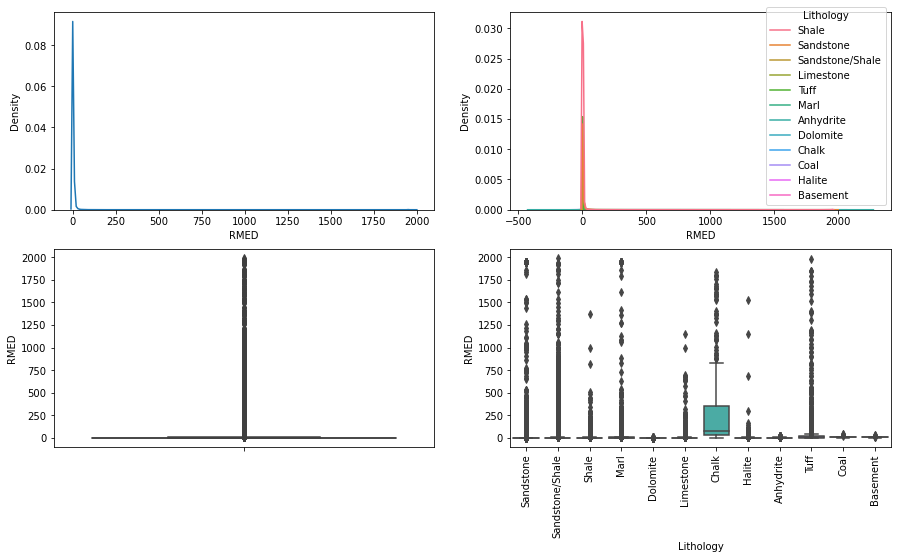

<Figure size 432x288 with 0 Axes>

In [19]:
distribution_plots(data2, Numeric_variables[2], "Lithology")

The data is right skewed with majority of its values detected as outliers. Only the RMED of one classes (Anhydrite) do not have most of its observations or values as outliers. The large variablity of RMED makes RMED a bad variable for predicting classes.

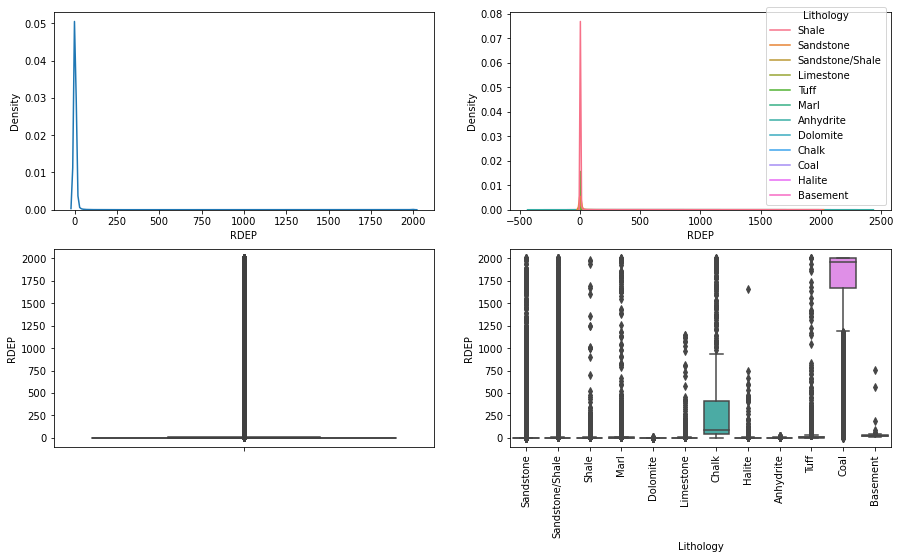

<Figure size 432x288 with 0 Axes>

In [20]:
distribution_plots(data2, Numeric_variables[3], "Lithology")

The data is right skewed with majority of its values detected as outliers. Only the RDEP of two classes (Anhydrite, Halite) do not have most of its observations or values as outliers. The large variablity of RDEP makes RDEP a bad variable for predicting classes.

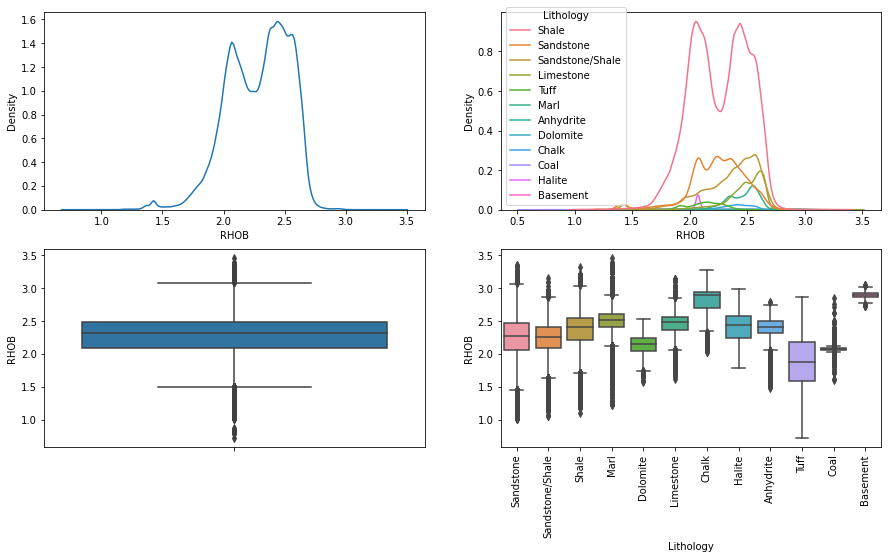

<Figure size 432x288 with 0 Axes>

In [21]:
distribution_plots(data2, Numeric_variables[4], "Lithology")

The distribution of RHOB for the different classes are different. The RHOB has outlies on both ends of its distribution, this is also true for the distribution of RHOB for each of the classes. Chalks and Basement have higher values than the rest of the classes. 

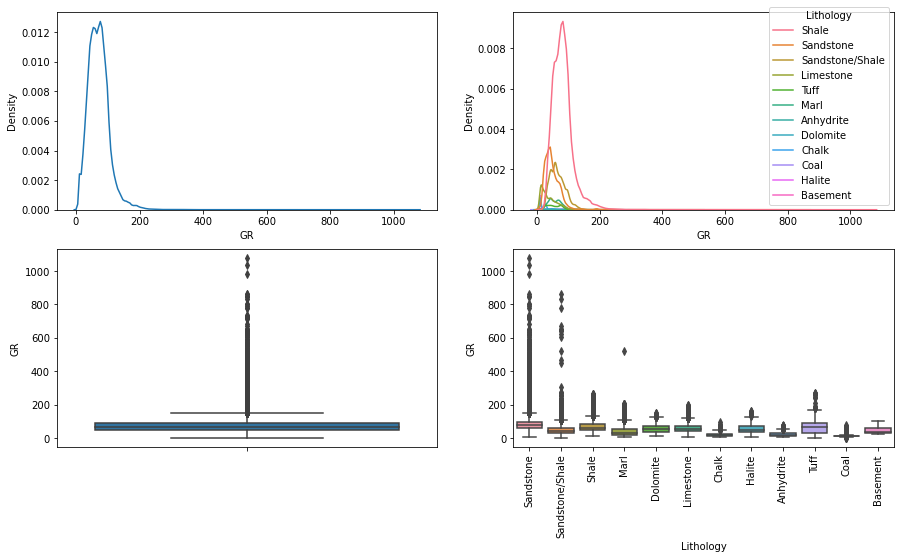

<Figure size 432x288 with 0 Axes>

In [22]:
distribution_plots(data2, Numeric_variables[5], "Lithology")

The distribution of GR is right skewed with the its outliers on the heavier side of its distribution. The different classes have different distribution of GR which is being distorted by outliers. 

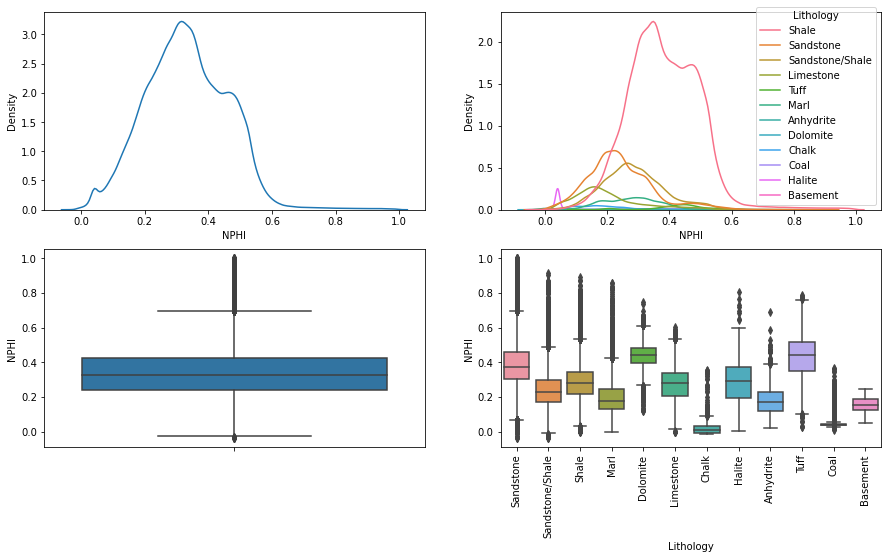

<Figure size 432x288 with 0 Axes>

In [23]:
distribution_plots(data2, Numeric_variables[6], "Lithology")

NPHI has outliers on both sides of its distribution. Sandstone, tuff and dolomite have higher values for NPHI.Chalk and Coal ahve lower values of NPHI 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


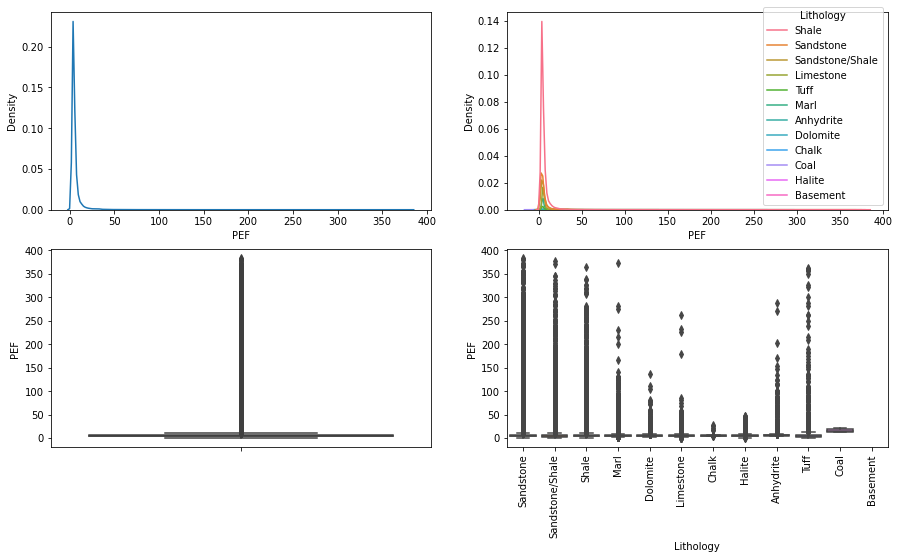

<Figure size 432x288 with 0 Axes>

In [24]:
distribution_plots(data2, Numeric_variables[7], "Lithology")

The distribution of the  Photoelectric Absorption Factor (PEF) is right skewed and 99% of its values are less 40. with the remaining 1% ranging from 39.22 to 383.13. This data has PEF of Basement lies outside the the 99th percentile of the PEF distribution. Removing the outliers for PEF would remove all the observations for PEF as its PEF values are "outliers"

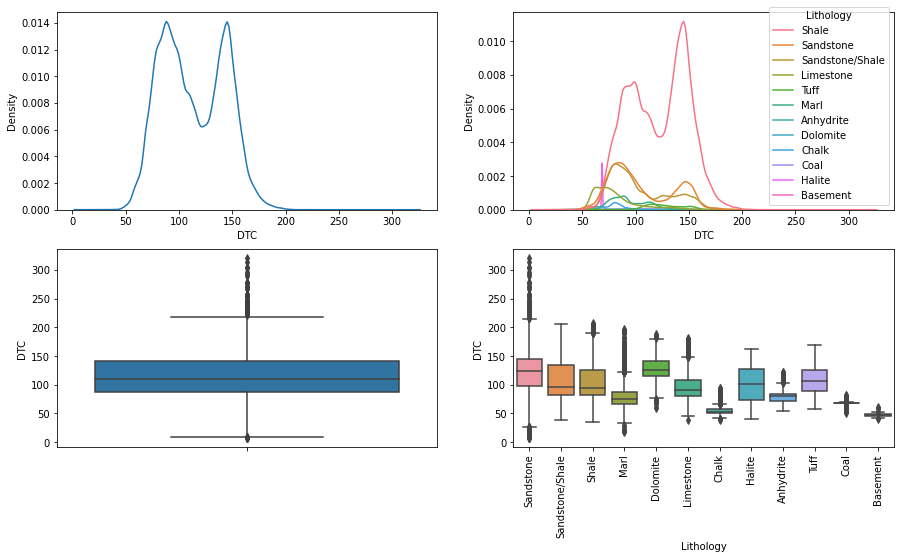

<Figure size 432x288 with 0 Axes>

In [25]:
distribution_plots(data2, Numeric_variables[8], "Lithology")

The distribution of Sonic (Compressional Slowness) (DTC) is multimodal and has outliers on both ends of its distribution. 99% of its values are less than 175. Basement and Chalk have lower values of DTC. the distribution of Tuff is and halite seems to be normally distributed. The different Lithologies have varying distributions with some classes having outliers on both ends of their distributions. 

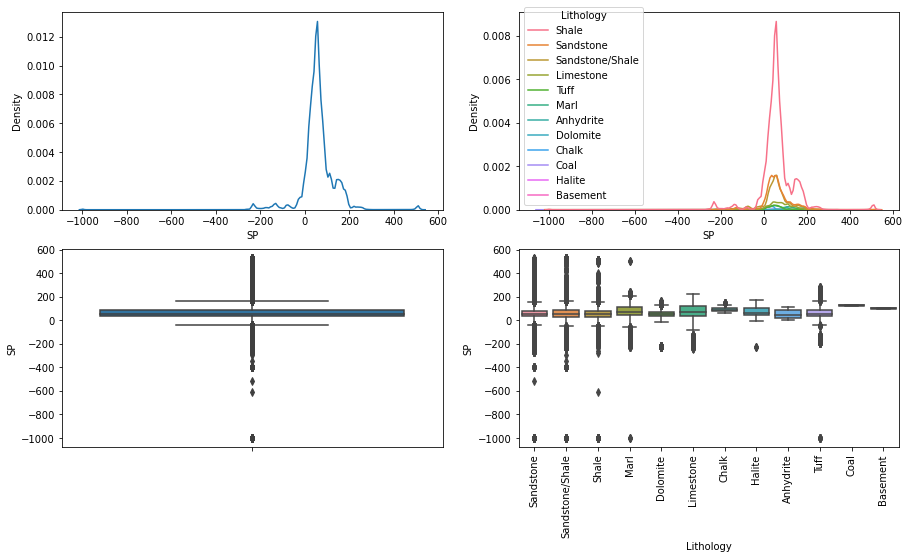

<Figure size 432x288 with 0 Axes>

In [26]:
distribution_plots(data2, Numeric_variables[9], "Lithology")

The distribution of SP is right skewed with outliers on both ends of its distribution. 95% of its values are less than 170. 5% of its values ranges from -24 to -999. The Lithologies have varying distribution of SP. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


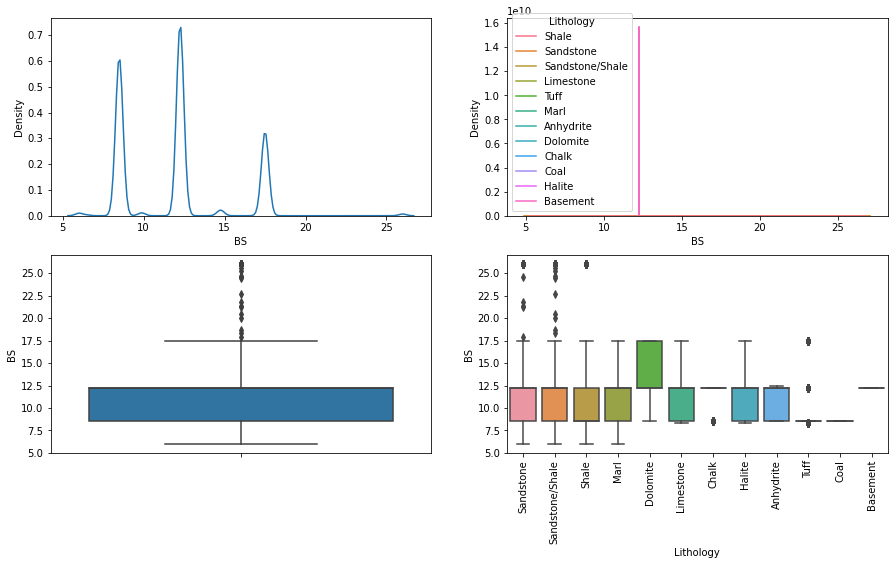

<Figure size 432x288 with 0 Axes>

In [27]:
distribution_plots(data2, Numeric_variables[10], "Lithology")

The distribution of BS is multimodal and has outliers on the heavier end of its distribution. Only the BS for Dolomite, Chalk, Coal and Basement have different distributions. The distribution of Sandstone, Sandstone/Shale, Shale and Marl are almost identical (excluding their outliers). 95% of the the BS values are less than or equal to 17.5.

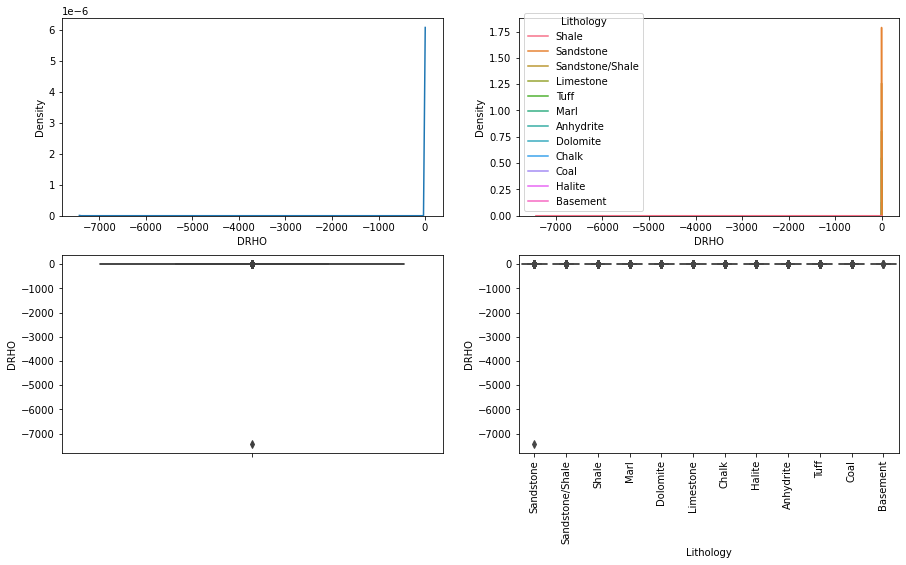

<Figure size 432x288 with 0 Axes>

In [28]:
distribution_plots(data2, Numeric_variables[11], "Lithology")

DRHO has a lot of outliers and one particularyly outstanding outlier (-7429.34). 78% of its values range between -0.075 and 0.075. 

### Removing outliers 

In [29]:
# Dropping observation with values of DRHO greater than 0.075 and less than 0.075
data2 = data2.query("DRHO > -0.075 and DRHO < 0.075")

In [30]:
# Dropping columns with high outliers
data2.drop(["RSHA", "RMED", "RDEP", "PEF"], axis="columns", inplace = True)

The columns dropped have outliers that affect some classes if removed. 

In [31]:
# Removing outliers of GR
data3 = data2[data2["GR"] < outlier_upper_limit(data2["GR"])]

In [32]:
# Removing outliers of NPHI
data3 = data3[(data3["NPHI"] < outlier_upper_limit(data3["NPHI"])) & (data3["NPHI"] > outlier_lower_limit(data3["NPHI"]))]

In [33]:
# Removing outliers of DTC
data3 = data3[(data3["DTC"] < outlier_upper_limit(data3["DTC"])) & (data3["DTC"] > outlier_lower_limit(data3["DTC"]))]

In [34]:
# Removing outliers of SP
data3 = data3[(data3["SP"] < outlier_upper_limit(data3["SP"])) & (data3["SP"] > outlier_lower_limit(data3["SP"]))]

### Encoding categorical variables

In [35]:
# using cat.codes to encode the categorical variables
data3[['WELL','GROUP',"FORMATION", "Lithology"]] = data3[['WELL','GROUP',"FORMATION", "Lithology"]].astype('category')
data3['WELL'] = data3['WELL'].cat.codes
data3['GROUP'] = data3['GROUP'].cat.codes
data3['FORMATION'] = data3['FORMATION'].cat.codes
data3['Lithology'] = data3['Lithology'].cat.codes

In [36]:
# Creating disctionaires that will be used to map the numeric categories to their respective labels
df6 = data2.copy()

df6[['WELL','GROUP',"FORMATION", "Lithology"]] = data2[['WELL','GROUP',"FORMATION", "Lithology"]].astype('category')
WELLS  = dict(enumerate(df6["WELL"].cat.categories))
GROUPS = dict(enumerate(df6["GROUP"].cat.categories))
FORMATIONS  = dict(enumerate(df6["FORMATION"].cat.categories))
Lithologies = dict(enumerate(df6["Lithology"].cat.categories))


### Filling missing values

In [37]:
# Filling missing values of FORCE_2020_LITHOFACIES_CONFIDENCE with 3
data3.FORCE_2020_LITHOFACIES_CONFIDENCE.fillna(3, inplace = True)

The FORCE_2020_LITHOFACIES_CONFIDENCE is a numeric categorical variable that tells us how confidence we are about the labels of each observation, with 1 as a very confident and 3 as not confident. Filled the missing values with 3, because it is safer to classify those observations as 3 which is the worst case scenario

In [38]:
# Filling the missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute       import IterativeImputer
#from catboost             import CatBoostRegressor

imputer = IterativeImputer(
                            verbose   = 2,
                            max_iter  = 20,
                            imputation_order = 'ascending' )


data4 = pd.DataFrame(imputer.fit_transform(data3), columns = data3.columns) # preserve the column nam

[IterativeImputer] Completing matrix with shape (405809, 18)
[IterativeImputer] Ending imputation round 1/20, elapsed time 13.04
[IterativeImputer] Change: 9.253400802091281, scaled tolerance: 6847.1645 
[IterativeImputer] Early stopping criterion reached.


Used the Iterative imputer to fill the missing values because it useds prediction algoriths to fills the missing values based on the values of the other columns for that observation.

In [39]:
# creating a new columns that contains the litholgy labels
data4["Lithology2"] = data4.FORCE_2020_LITHOFACIES_LITHOLOGY.map(lithology_keys)

In an attempt of fill the missing values, I had encoded all the categorical variables, so I created a new columns for the categorical labels of the lithologies

In [40]:
# Defining a function that conerts keys of a dictionary to values and values to kwys
def values_keys_converter(dict_):
    dict__ = {}
    for k,v in dict_.items():
        dict__[v] = k
    return dict__

WELLS_2int = values_keys_converter(WELLS)
GROUPS_2int = values_keys_converter(GROUPS)
FORMATIONS_2int = values_keys_converter(FORMATIONS)
Litholgies_2int = values_keys_converter(Lithologies)


### Detailed summary of the clean data

In [41]:
skim(data4)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 405809 │ │ float64     │ 18    │                                                          │
│ │ Number of columns │ 19     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ WELL                   │   0 │     0 │       30 │      17 │       0 │      15 │      43 │      59 │ █▄▇██▇ │  │
│ │ DEPTH_MD               │   0 │     0 │     2300 │     880 │     310 │    1700 │    2900 │    4800 │ ▂▆█▆▂▁ │  │
│ │ X_LOC                  │   0 │     0 │   480000 │   38000 │  430000 │  450000 │  530000 │  550000 │ █▆▄▃▇▅ │  │
│ │ Y_LOC                  │   0 │     0 │  6700000 │  130000 │ 6400000 │ 6600000 │ 6800000 │ 6800000 │ ▅▁▂ ▇█ │  │
│ │ Z_LOC                  │   0 │     0 │    -2300 │     880 │   -4800 │   -2800 │   -1600 │    -290 │ ▁▂▆█▆▂ │  │
│ │ GROUP                  │   0 │     0 │      6.4 │     3.3 │       0 │       3 │       9 │      12 │ ▂██▆▇█ │  │
│ │ FORMATION              │   0 │     0 │       30 │      20 │      -1 │      14 │      47 │      58 │ ▇▂▅▆▅█ │  │
│ │ CALI                   │   0 │     0 │       12 │     3.1 │     3.3 │     9.1 │      14 │      25 │  ▆█▃▁  │  │
│ │ RHOB                   │   0 │     0 │      2.3 │    0.24 │    0.72 │     2.1 │     2.5 │     3.1 │   ▁▇█  │  │
│ │ GR                     │   0 │     0 │       69 │      26 │     0.9 │      51 │      87 │     150 │ ▁▅█▇▂  │  │
│ │ NPHI                   │   0 │     0 │     0.34 │    0.12 │  -0.036 │    0.25 │    0.44 │    0.69 │ ▁▄██▆  │  │
│ │ DTC                    │   0 │     0 │      110 │      29 │      18 │      85 │     130 │     190 │  ▂█▄▄  │  │
│ │ SP                     │   0 │     0 │       66 │      44 │     -50 │      37 │      86 │     170 │ ▁▂█▆▂▂ │  │
│ │ BS                     │   0 │     0 │       11 │     2.3 │     3.9 │     8.5 │      12 │      19 │  ▇▃█▂  │  │
│ │ DRHO                   │   0 │     0 │   0.0021 │   0.024 │  -0.075 │  -0.012 │   0.013 │   0.075 │  ▁█▆▂▁ │  │
│ │ FORCE_2020_LITHOFACI   │   0 │     0 │    61000 │   15000 │   30000 │   65000 │   65000 │   99000 │  ▂  █  │  │
│ │ FORCE_2020_LITHOFACI   │   0 │     0 │      1.1 │     0.4 │       1 │       1 │       1 │       3 │  █  ▁  │  │
│ │ Lithology              │   0 │     0 │      9.1 │     1.6 │       0 │       8 │      10 │      11 │    ▁▄█ │  │
│ └────────────────────────┴─────┴───────┴──────────┴─────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━

### How many observations of each Lithologies are there?


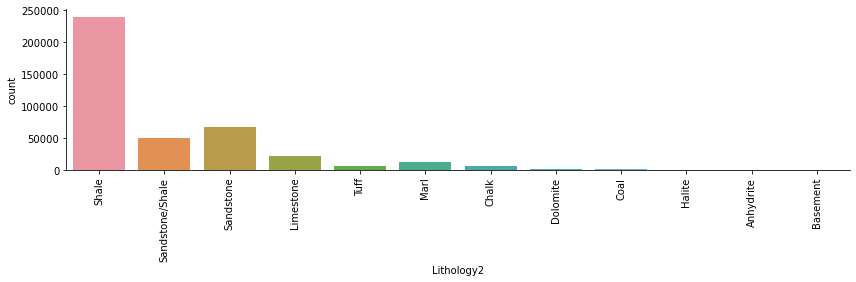

<Figure size 432x288 with 0 Axes>

In [43]:
# Plotting the count of each Lithology
g = sns.catplot(data = data4, x= "Lithology2", kind = "count", height = 3, aspect = 12/3)
g.set_xticklabels(rotation = 90)
plt.show()
plt.clf()

Shale is the most occured lithology in then dataset and classes like Basement, halite, Coal, Chalk, dolomite, Anydrite, marl, Tufff and Limetsone are largely underrepresented. Hence,  **The classes are imbalanced**

### Having cleaned the data, what is the distribution of 
- CALI
- RHOB
- GR
- NPHI
- DTC
- SP
- BS
- DRHO

In [114]:
New_numeric_atrributes = list(data4.columns)[7:-4]

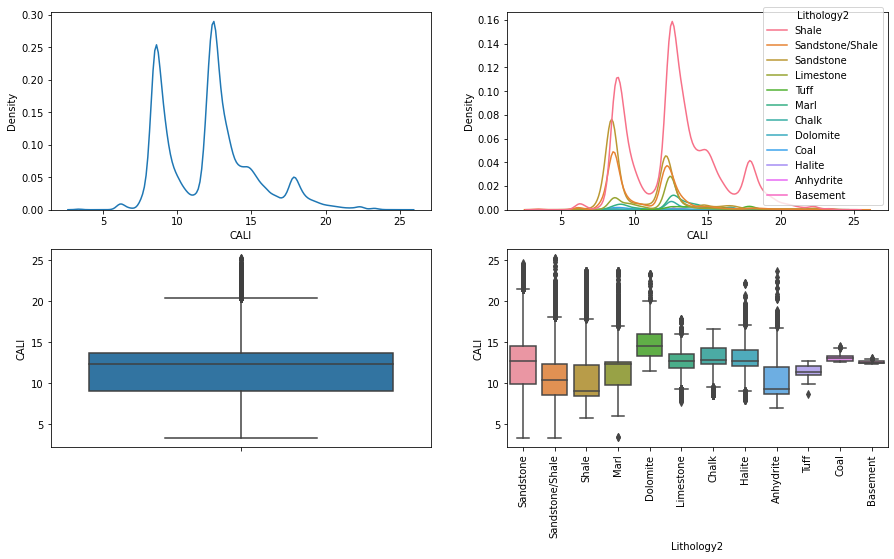

<Figure size 432x288 with 0 Axes>

In [115]:
distribution_plots(data4, New_numeric_atrributes[0], "Lithology2")

The distributions of CALI for the different lithologies varies. Anhydrite and shale have the lowest mdeian values.

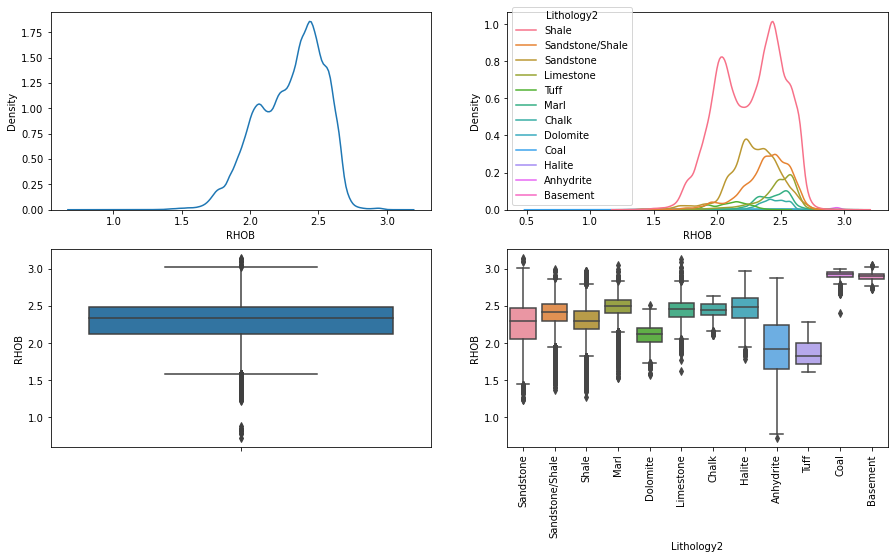

<Figure size 432x288 with 0 Axes>

In [116]:
distribution_plots(data4, New_numeric_atrributes[1], "Lithology2")

Anhydrite has the second lowest median value for RHOB. Its values is the most widely spread. Basemey anmd coal are seem to have high values of RHOB, and are the least widely spread distributions. The RHOB distribution of each lithology varies.

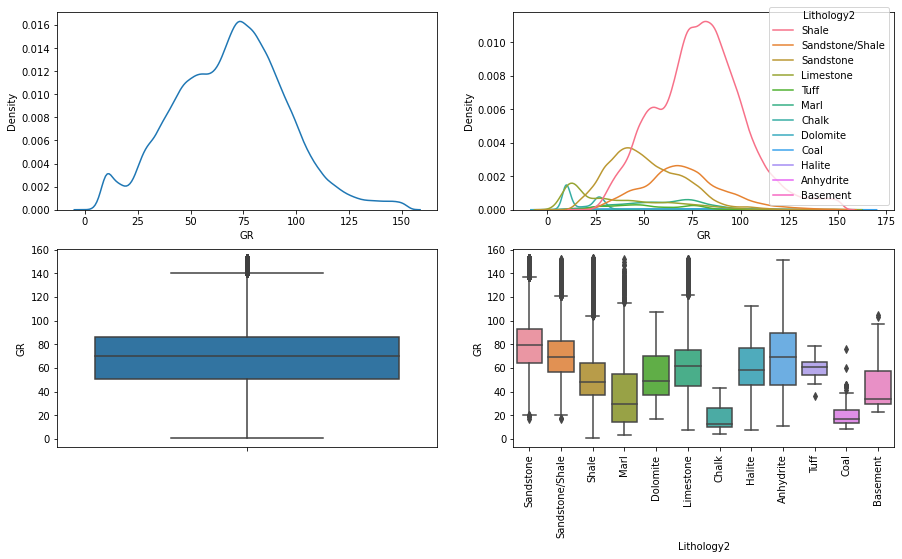

<Figure size 432x288 with 0 Axes>

In [117]:
distribution_plots(data4, New_numeric_atrributes[2], "Lithology2")

Some outlier values were detected for GR on the heavier end of its distribution. Anhydrite has the most widespread values for GR, with Chalk and Coal having the least median values. The GR distribution for each lithology differs. A lot of outliers were detected for Sandstone, Sandstone/shale, Shale, Marl and Limestone.

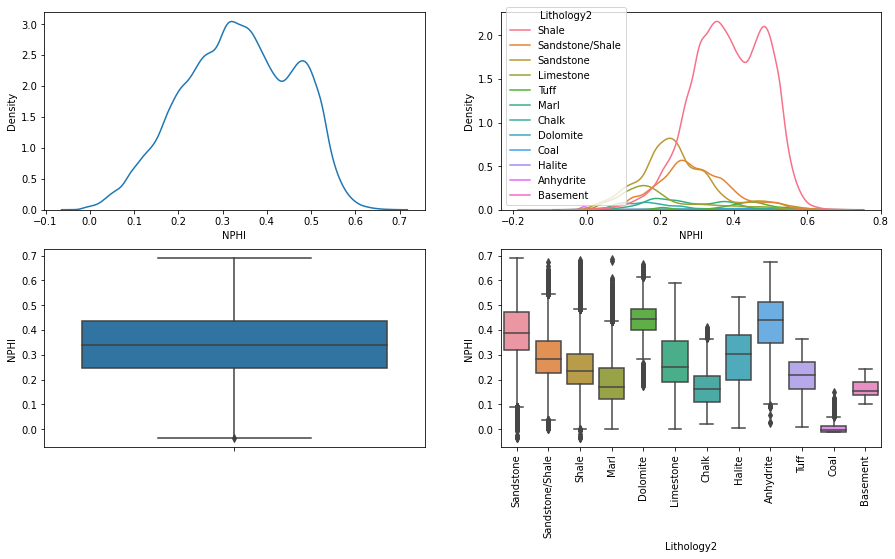

<Figure size 432x288 with 0 Axes>

In [118]:
distribution_plots(data4, New_numeric_atrributes[3], "Lithology2")

No outlier values were detected for NPHI. Sandstone has the most widespread values for NPHI, with Coal having the least median value. The NPHI distribution for each lithology differs. A lot of outliers were detected for Sandstone, Sandstone/shale, Shale, Marl and dolomite.

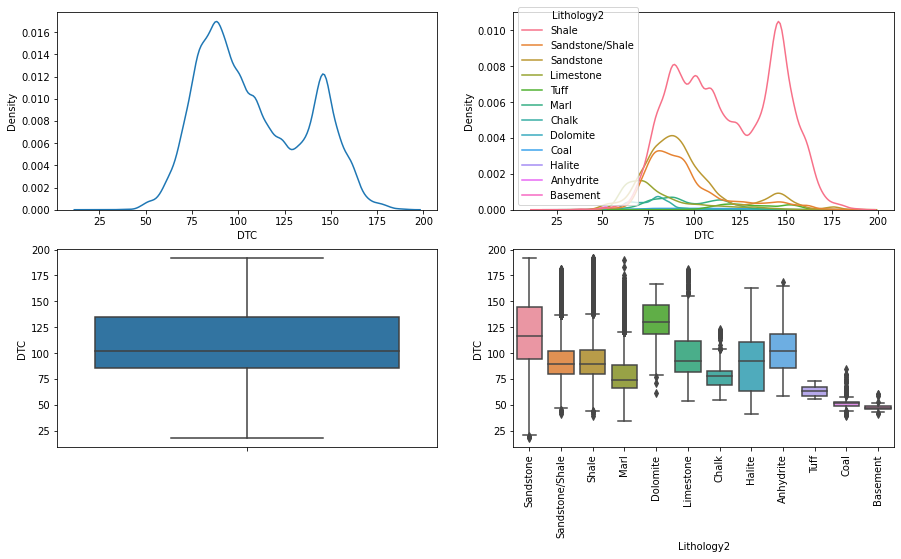

<Figure size 432x288 with 0 Axes>

In [119]:
distribution_plots(data4, New_numeric_atrributes[4], "Lithology2")

The distribution of DTC is similar with that of NPHI with exception of the last three lithologies (Tuff, Coal and Basemet). could there be a relationship between both variables. No outlier values were detected for DTC. Sanstone has the most widespread values for DTC, with Basement and Coal having the least median values. The NPHI distribution for each lithology differs.

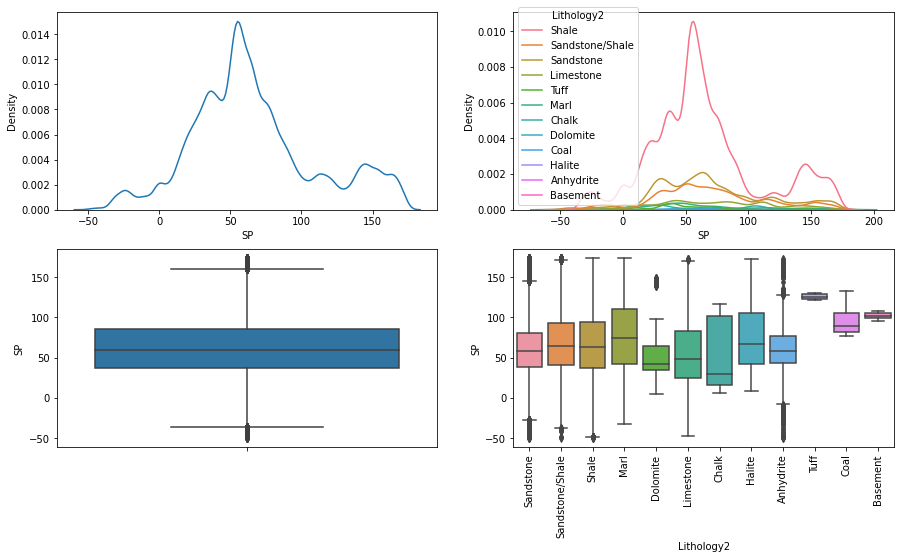

<Figure size 432x288 with 0 Axes>

In [120]:
distribution_plots(data4, New_numeric_atrributes[5], "Lithology2")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


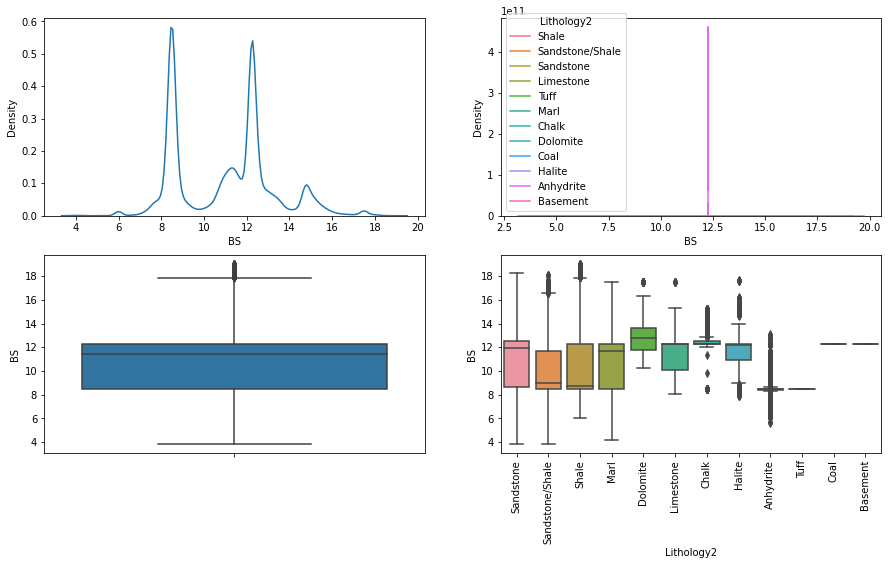

<Figure size 432x288 with 0 Axes>

In [121]:
distribution_plots(data4, New_numeric_atrributes[6], "Lithology2")

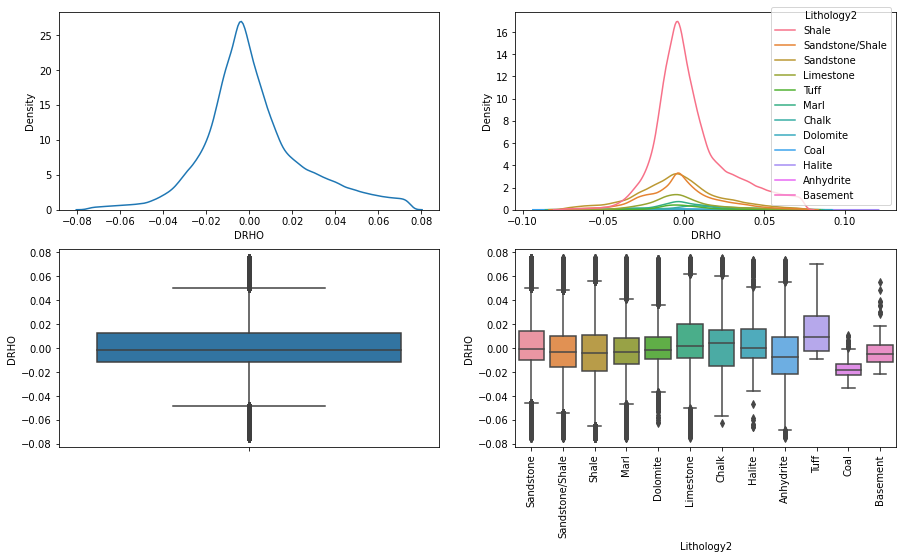

<Figure size 432x288 with 0 Axes>

In [122]:
distribution_plots(data4, New_numeric_atrributes[7], "Lithology2")

Outliers were detected for DRHO on both ends of its distribution, The distributions of each lithology do not varyu so much with exception of Tuff, Coal and Halite

### Is there a relationship between Groups and Lithologies?

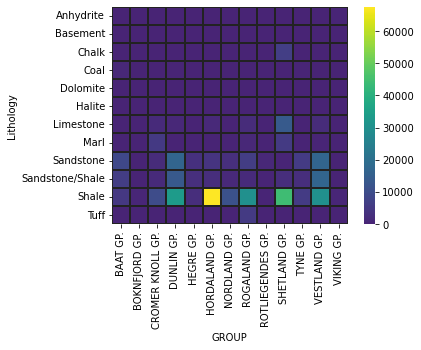

<Figure size 432x288 with 0 Axes>

In [45]:
# Making a plot of the number of each lithologies in each group
sns.heatmap(data = pd.crosstab(data4.Lithology.map(Lithologies), data4.GROUP.map(GROUPS)), 
            cmap="viridis", 
            fmt = "", 
            center = 30000,
            square = True, 
            linewidth = 0.1,
            linecolor = "#222",
            cbar = True)
#plt.savefig("GroupLithology")
plt.show()
plt.clf()

Shale is most found in Hordaland, Rogaland, Shetland and Vestland groups. Chalk and Limestone is mostly found in the Shetland group. Marl is mostly found in Cromer knoll and Shetland group. There could be alot more relationship being distorted or not visible due to the imbalance nature of the lithologies.

### Is there a relationship between Formations and Lithologies?

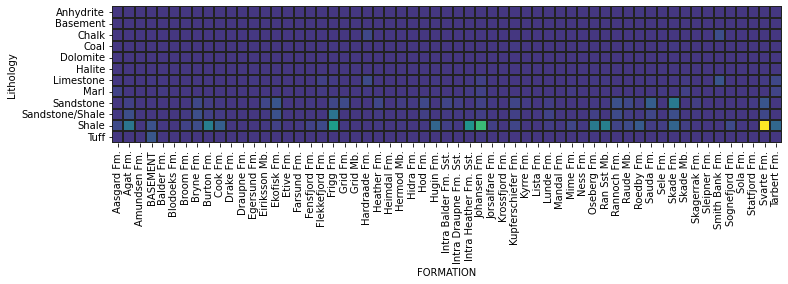

<Figure size 432x288 with 0 Axes>

In [46]:
# Making a plot of the number of each lithologies in each formation
plt.figure(figsize=(12,36))
sns.heatmap(data = pd.crosstab(data4.Lithology.map(Lithologies), data4.FORMATION.map(FORMATIONS)), 
            cmap="viridis", 
            fmt = "", 
            center = 15000,
            square = True, 
            linewidth = 0.1,
            linecolor = "#222",
            cbar = False)
#plt.savefig("FormationLithology")
plt.show()
plt.clf()

In [48]:
data4.head(2)

WELL  DEPTH_MD         X_LOC      Y_LOC        Z_LOC  GROUP  FORMATION  \
0   0.0  1139.312  437640.84375  6470976.0 -1114.263428    6.0       57.0   
1   0.0  1139.464  437640.84375  6470976.0 -1114.415405    6.0       57.0   

        CALI      RHOB         GR      NPHI         DTC         SP         BS  \
0  18.033762  1.813854  58.501236  0.639708  144.290085  46.950382  15.096285   
1  17.976252  1.762011  54.480759  0.588014  150.236420  46.911999  15.043890   

     DRHO  FORCE_2020_LITHOFACIES_LITHOLOGY  \
0  0.0054                           65000.0   
1  0.0054                           65000.0   

   FORCE_2020_LITHOFACIES_CONFIDENCE  Lithology Lithology2  
0                                1.0       10.0      Shale  
1                                1.0       10.0      Shale

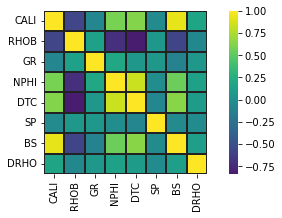

<Figure size 432x288 with 0 Axes>

In [47]:
# Making a plot of the correlation between numeric variables
plt.figure(figsize=(8,3))
sns.heatmap(data = data4.iloc[:,7:-4].corr(), 
            cmap="viridis", 
            fmt = "", 
            center = 0,
            square = True, 
            linewidth = 0.1,
            linecolor = "#222")

plt.show()
plt.clf()

There is a strong positive linear correlation between DTC and NPHI. Three most independet logs are GR, DRH and SP. There is a strong linear negative correlation between RHOB and CALI, RHOB and NPHI, RHOB and DTC, RHOB and BS. 

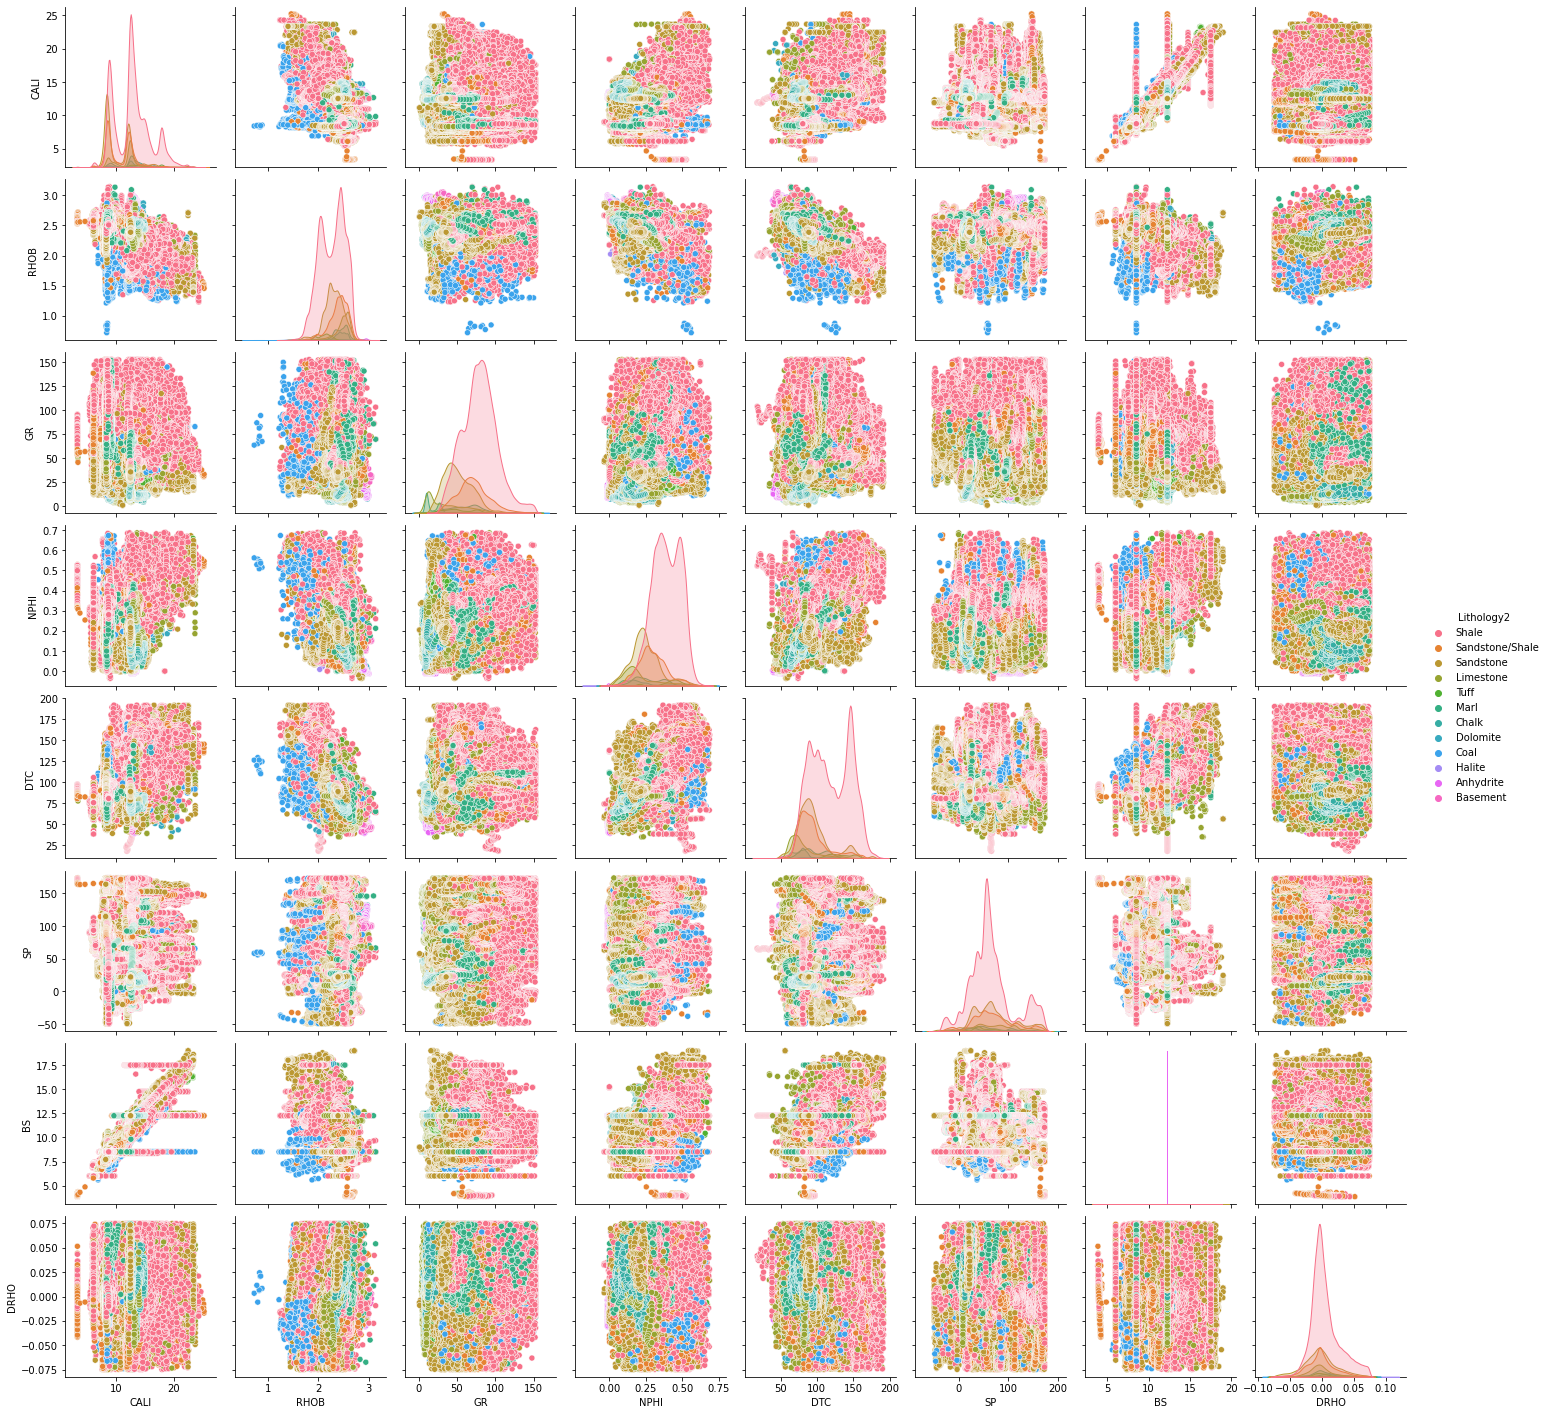

<Figure size 432x288 with 0 Axes>

In [129]:
# Ploting a pairplot that shows the relationship between variables. 
sns.pairplot(data=data4[["CALI", "RHOB", "GR", "NPHI", "DTC", "SP", "BS", "DRHO", "Lithology2"]], diag_kind="kde", hue="Lithology2")
#plt.savefig("pairplot")
plt.show()
plt.clf()

The pairplot shows the relationshib between the numeric variables and the lithologies. 

In [51]:
data4.head()

WELL  DEPTH_MD         X_LOC      Y_LOC        Z_LOC  GROUP  FORMATION  \
0   0.0  1139.312  437640.84375  6470976.0 -1114.263428    6.0       57.0   
1   0.0  1139.464  437640.84375  6470976.0 -1114.415405    6.0       57.0   
2   0.0  1139.616  437640.84375  6470976.0 -1114.567383    6.0       57.0   
3   0.0  1139.768  437640.84375  6470976.0 -1114.719360    6.0       57.0   
4   0.0  1139.920  437640.84375  6470976.0 -1114.871338    6.0       57.0   

        CALI      RHOB         GR      NPHI         DTC         SP         BS  \
0  18.033762  1.813854  58.501236  0.639708  144.290085  46.950382  15.096285   
1  17.976252  1.762011  54.480759  0.588014  150.236420  46.911999  15.043890   
2  17.999220  1.693400  51.365631  0.563947  156.456635  44.567566  15.012589   
3  18.015600  1.636616  50.678062  0.582253  162.392105  44.440941  14.958428   
4  18.441620  1.619630  52.008244  0.603731  163.404480  45.034451  15.195759   

       DRHO  FORCE_2020_LITHOFACIES_LITHOLOGY  \
0  0.005400                           65000.0   
1  0.005400                           65000.0   
2  0.004450                           65030.0   
3  0.002503                           65030.0   
4 -0.000568                           65030.0   

   FORCE_2020_LITHOFACIES_CONFIDENCE  Lithology       Lithology2  
0                                1.0       10.0            Shale  
1                                1.0       10.0            Shale  
2                                1.0        9.0  Sandstone/Shale  
3                                1.0        9.0  Sandstone/Shale  
4                                1.0        9.0  Sandstone/Shale

### Feature Selection
The features selected are
   - X_LOC
   - Y_LOC
   - Z_LOC
   - GROUP
   - FORMATION
   - CALI
   - RHOB
   - GR
   - NPHI
   - DTC
   - SP
   - BS
   - DRHO
   
Depth has a strong relationship with Z_LOC so was not selected as a feature, WELL was not selected because they are labels for the source of the data and we want the model to generalize to other wells in the region and predicts its lithology without taking the name of the well into account. FORCE_2020_LITHOFACIES_LITHOLOGY was the variable mapped into the Target variable, Lithology. FORCE_2020_LITHOFACIES_CONFIDENCE was dropped because it only shows how confident of the labels we are. 

In [52]:
# Selecting the target variable 
Y = data4["Lithology"].values

# Selecting the Predictor Variables
X = data4.iloc[:,2:-4].values

### Splitting the dataset

Splitting the data into 3 dataset in ratio 00:15:15 for train, cross validation and test 

In [53]:
# Splitting the dataset into Train, Cross Validation and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    train_size   =  0.6, 
                                                    random_state =  4)
X_test, X_CV, y_test, y_CV = train_test_split( X_test, 
                                               y_test,
                                               test_size = 0.5, 
                                               random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:',  X_test.shape,  y_test.shape)
print ('Cross Validation set:', X_CV.shape,  y_CV.shape)

Train set: (243485, 13) (243485,)
Test set: (81162, 13) (81162,)
Cross Validation set: (81162, 13) (81162,)


<a id='mdd'></a>
## Model Development

In [54]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Normalization
np.set_printoptions(precision=2)

### Model 1

In [55]:
# Intializing model and designing model Architecture
tf.random.set_seed(1234)  

normalizer = Normalization(axis=-1) 
normalizer.adapt(tf.convert_to_tensor(X_train))      

model1 = Sequential(
    [   normalizer,
        Dense(16,  activation  = 'relu',   name = "L1"),
        Dense(64, activation  = 'relu',   name = "L2"),
        Dense(32, activation  = 'relu',   name = "L3"),
        Dense(16, activation  = 'relu',   name = "L4"),
        Dense(12,  activation  = 'softmax',name = "CC")
    ]
                    )

In [56]:
# Compiling the model
model1.compile (
    loss     = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
                )



In [57]:
# Fitting the model
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="loss",
                                        mode ="min", patience = 5,
                                        restore_best_weights = True)

model1.fit(X_train, y_train,
                    epochs = 100,
                    callbacks =[earlystopping])


Epoch 1/100
7609/7609 [==============================] - 17s 2ms/step - loss: 0.6256
Epoch 2/100
7609/7609 [==============================] - 15s 2ms/step - loss: 0.4929
Epoch 3/100
7609/7609 [==============================] - 16s 2ms/step - loss: 0.4612
Epoch 4/100
7609/7609 [==============================] - 16s 2ms/step - loss: 0.4417
Epoch 5/100
7609/7609 [==============================] - 16s 2ms/step - loss: 0.4265
Epoch 6/100
7609/7609 [==============================] - 16s 2ms/step - loss: 0.4161
Epoch 7/100
7609/7609 [==============================] - 17s 2ms/step - loss: 0.4062
Epoch 8/100
7609/7609 [==============================] - 17s 2ms/step - loss: 0.3984
Epoch 9/100
7609/7609 [==============================] - 17s 2ms/step - loss: 0.3934
Epoch 10/100
7609/7609 [==============================] - 16s 2ms/step - loss: 0.3870
Epoch 11/100
7609/7609 [==============================] - 16s 2ms/step - loss: 0.3825
Epoch 12/100
7609/7609 [==============================] - 16s 2

In [58]:
# Model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 L1 (Dense)                  (None, 16)                224       
                                                                 
 L2 (Dense)                  (None, 64)                1088      
                                                                 
 L3 (Dense)                  (None, 32)                2080      
                                                                 
 L4 (Dense)                  (None, 16)                528       
                                                                 
 CC (Dense)                  (None, 12)                204       
                                                        

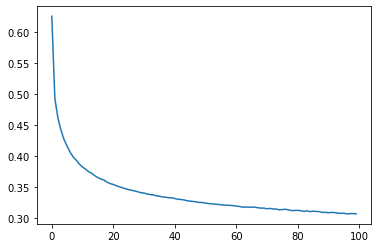

In [59]:
# Plotting the loss the model
plt.plot(model1.history.history["loss"])

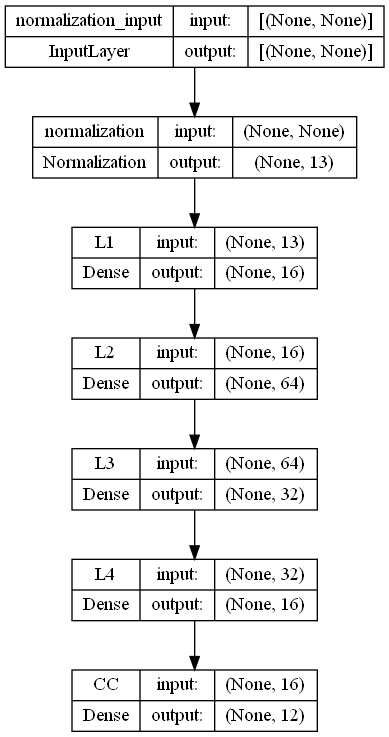

In [61]:
# Model Architecture
tf.keras.utils.plot_model(model1, "Model 1.png", show_shapes = True)

Model 1 has an accuracy of 0.85 and an F1 score of 0.86. Trying to develop a model with a better peformance. 

### Model 2

In [62]:
# Intializing model and designing model Architecture
tf.random.set_seed(1234)  

normalizer = Normalization(axis=-1) 
normalizer.adapt(tf.convert_to_tensor(X_train))      

model2 = Sequential(
    [   normalizer,
        Dense(64,  activation  = 'relu',   name = "L1"),
        Dense(64, activation  = 'relu',   name = "L2"),
        Dense(32, activation  = 'relu',   name = "L3"),
        Dense(16, activation  = 'relu',   name = "L4"),
        Dense(12,  activation  = 'softmax',name = "CC")
    ]
                    )

In [63]:
# Compiling the model
model2.compile (
    loss     = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
                )


In [64]:
# Fitting the model
earlystopping = callbacks.EarlyStopping(monitor ="loss",
                                        mode ="min", patience = 5,
                                        restore_best_weights = True)

model2.fit(X_train, y_train,
                    epochs = 200,
                    callbacks =[earlystopping])

Epoch 1/200
7609/7609 [==============================] - 19s 2ms/step - loss: 0.5586
Epoch 2/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.4317
Epoch 3/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.3949
Epoch 4/200
7609/7609 [==============================] - 19s 2ms/step - loss: 0.3744
Epoch 5/200
7609/7609 [==============================] - 19s 2ms/step - loss: 0.3595
Epoch 6/200
7609/7609 [==============================] - 17s 2ms/step - loss: 0.3484
Epoch 7/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.3386
Epoch 8/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.3313
Epoch 9/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.3249
Epoch 10/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.3188
Epoch 11/200
7609/7609 [==============================] - 17s 2ms/step - loss: 0.3139
Epoch 12/200
7609/7609 [==============================] - 18s 2

In [65]:
# Model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 13)               27        
 ion)                                                            
                                                                 
 L1 (Dense)                  (None, 64)                896       
                                                                 
 L2 (Dense)                  (None, 64)                4160      
                                                                 
 L3 (Dense)                  (None, 32)                2080      
                                                                 
 L4 (Dense)                  (None, 16)                528       
                                                                 
 CC (Dense)                  (None, 12)                204       
                                                      

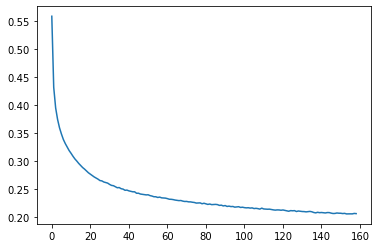

In [66]:
# Plotting the loss the model
plt.plot(model2.history.history["loss"])

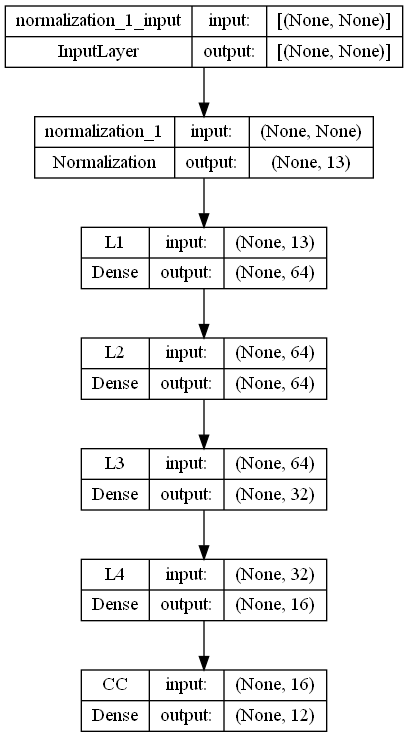

In [126]:
# Plotting the loss the model
tf.keras.utils.plot_model(model2, "Model 2.png", show_shapes = True)

Model 2 has an accuracy of 0.88 and an F1 score of 0.88. Trying to develop a model with a better peformance.

### Model 3

In [67]:
# Intializing model and designing model Architecture
tf.random.set_seed(1234)  

normalizer = Normalization(axis=-1) 
normalizer.adapt(tf.convert_to_tensor(X_train))      

model3 = Sequential(
    [   normalizer,
        Dense(128,  activation  = 'relu',   name = "L1"),
        Dense(64, activation  = 'relu',   name = "L2"),
        Dense(32, activation  = 'relu',   name = "L3"),
        Dense(16, activation  = 'relu',   name = "L4"),
        Dense(12,  activation  = 'softmax',name = "CC")
    ]
                    )

In [68]:
# Compiling the model
model3.compile (
    loss     = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
                )


In [69]:
# Fitting the model
earlystopping = callbacks.EarlyStopping(monitor ="loss",
                                        mode ="min", patience = 5,
                                        restore_best_weights = True)

model3.fit(X_train, y_train,
                    epochs = 200,
                    callbacks =[earlystopping])

Epoch 1/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.5360
Epoch 2/200
7609/7609 [==============================] - 17s 2ms/step - loss: 0.4151
Epoch 3/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.3785
Epoch 4/200
7609/7609 [==============================] - 17s 2ms/step - loss: 0.3582
Epoch 5/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.3432
Epoch 6/200
7609/7609 [==============================] - 17s 2ms/step - loss: 0.3325
Epoch 7/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.3227
Epoch 8/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.3157
Epoch 9/200
7609/7609 [==============================] - 17s 2ms/step - loss: 0.3098
Epoch 10/200
7609/7609 [==============================] - 16s 2ms/step - loss: 0.3023
Epoch 11/200
7609/7609 [==============================] - 17s 2ms/step - loss: 0.2977
Epoch 12/200
7609/7609 [==============================] - 17s 2

In [70]:
# Model Summary
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 13)               27        
 ion)                                                            
                                                                 
 L1 (Dense)                  (None, 128)               1792      
                                                                 
 L2 (Dense)                  (None, 64)                8256      
                                                                 
 L3 (Dense)                  (None, 32)                2080      
                                                                 
 L4 (Dense)                  (None, 16)                528       
                                                                 
 CC (Dense)                  (None, 12)                204       
                                                      

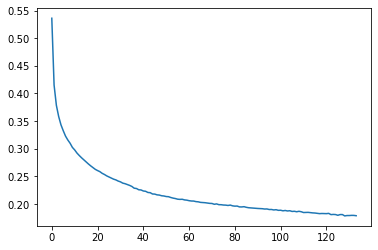

In [71]:
# Plotting the loss the model
plt.plot(model3.history.history["loss"])

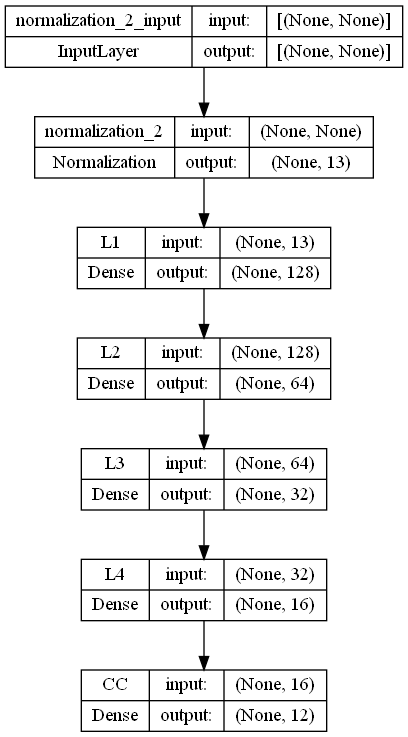

In [127]:
# Plotting the loss the model
tf.keras.utils.plot_model(model3, "Model 3.png", show_shapes = True)

Model 3 has an accuracy of 0.89 and an F1 score of 0.89. Trying to develop a model with a better peformance.

### Model 4

In [72]:
# Intializing model and designing model Architecture
tf.random.set_seed(1234)  

normalizer = Normalization(axis=-1) 
normalizer.adapt(tf.convert_to_tensor(X_train))      

model4 = Sequential(
    [   normalizer,
        Dense(256,  activation  = 'relu',   name = "L1"),
        Dense(64, activation  = 'relu',   name = "L2"),
        Dense(32, activation  = 'relu',   name = "L3"),
        Dense(16, activation  = 'relu',   name = "L4"),
        Dense(12,  activation  = 'softmax',name = "CC")
    ]
                    )

In [73]:
# Compiling the model
model4.compile (
    loss     = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
                )


In [74]:
# Fitting the model
earlystopping = callbacks.EarlyStopping(monitor ="loss",
                                        mode ="min", patience = 5,
                                        restore_best_weights = True)

model4.fit(X_train, y_train,
                    epochs = 200,
                    callbacks =[earlystopping])

Epoch 1/200
7609/7609 [==============================] - 19s 2ms/step - loss: 0.5345
Epoch 2/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.4110
Epoch 3/200
7609/7609 [==============================] - 20s 3ms/step - loss: 0.3737
Epoch 4/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.3537
Epoch 5/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.3379
Epoch 6/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.3256
Epoch 7/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.3149
Epoch 8/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.3065
Epoch 9/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.2991
Epoch 10/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.2921
Epoch 11/200
7609/7609 [==============================] - 18s 2ms/step - loss: 0.2866
Epoch 12/200
7609/7609 [==============================] - 18s 2

In [75]:
# Model Summary
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 13)               27        
 ion)                                                            
                                                                 
 L1 (Dense)                  (None, 256)               3584      
                                                                 
 L2 (Dense)                  (None, 64)                16448     
                                                                 
 L3 (Dense)                  (None, 32)                2080      
                                                                 
 L4 (Dense)                  (None, 16)                528       
                                                                 
 CC (Dense)                  (None, 12)                204       
                                                      

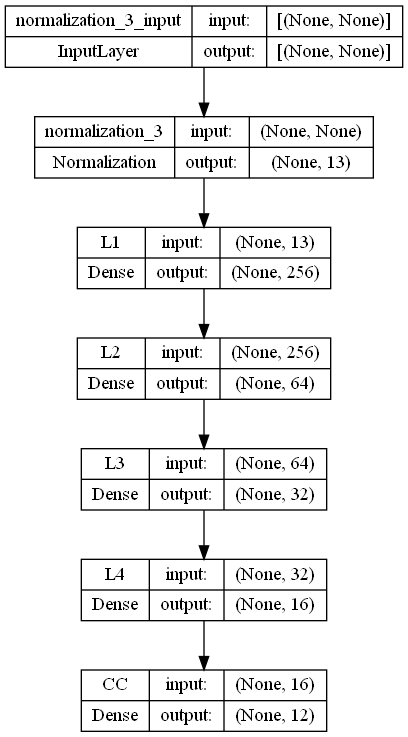

In [128]:
# Plotting the loss the model
tf.keras.utils.plot_model(model4, "Model 4.png", show_shapes = True)

Model 4 has an accuracy of 0.85 and an F1 score of 0.86. Trying to develop a model with a better peformance.

### <a id='mde'></a>
## Model Evaluation

In [77]:
# Defining a function that plots the confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, jaccard_score, f1_score
def draw_confusion_matrix(cm, title = None):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,
                fmt="d", 
                center=0, 
                cmap='viridis',  
                square = True, 
                linewidth = 0.1, 
                linecolor = "#222") 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    if title != None:
        plt.savefig(title)
    plt.show()
    plt.clf()
    

In [78]:
# defing a function that makes predictions
def nnmodel_predict(Model, X_train):
    prediction = Model.predict(X_train)
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction, axis=1)
    return yhat

In [85]:
# defining a function that calculates the accuracy of the model and plots the confusion matrix
def accuracy_metrics(y_train, yhat, title=None):
    print(f" the accuarcy of the model is {accuracy_score(y_train, yhat)} \n")
    print(f" the F1 score of the mdel is {f1_score(y_train, yhat, average='weighted')} \n") 
    print(f" the jaccard score of the model is {jaccard_score(y_train, yhat, average='weighted')}\n")
    cm = confusion_matrix(y_train,yhat)
    draw_confusion_matrix(cm, title)
    print(classification_report(y_train, yhat))

### Train set

In [81]:
yhat_train = nnmodel_predict(model3, X_train)


7609/7609 [==============================] - 12s 2ms/step


 the accuarcy of the model is 0.9344230650758774 

 the F1 score of the mdel is 0.9342925038194108 

 the jaccard score of the model is 0.8802127455699997



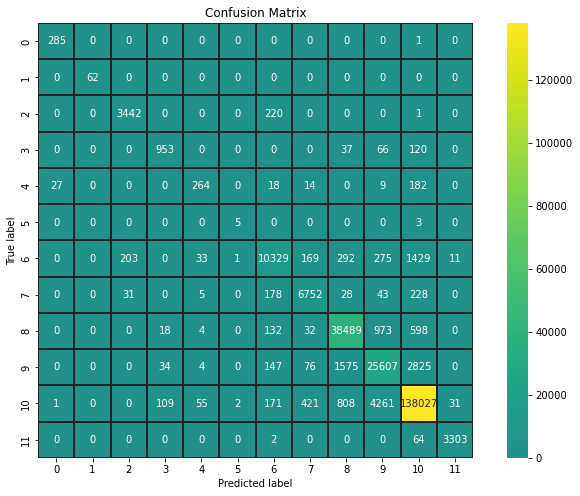

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       286
         1.0       1.00      1.00      1.00        62
         2.0       0.94      0.94      0.94      3663
         3.0       0.86      0.81      0.83      1176
         4.0       0.72      0.51      0.60       514
         5.0       0.62      0.62      0.62         8
         6.0       0.92      0.81      0.86     12742
         7.0       0.90      0.93      0.92      7265
         8.0       0.93      0.96      0.94     40246
         9.0       0.82      0.85      0.83     30268
        10.0       0.96      0.96      0.96    143886
        11.0       0.99      0.98      0.98      3369

    accuracy                           0.93    243485
   macro avg       0.88      0.86      0.87    243485
weighted avg       0.93      0.93      0.93    243485



<Figure size 432x288 with 0 Axes>

In [86]:
accuracy_metrics(y_train, yhat_train)

### Cross validation set

In [87]:
yhat_CV = nnmodel_predict(model3, X_CV)


2537/2537 [==============================] - 4s 1ms/step


 the accuarcy of the model is 0.9218106995884774 

 the F1 score of the mdel is 0.9216548326365035 

 the jaccard score of the model is 0.8596822497499461



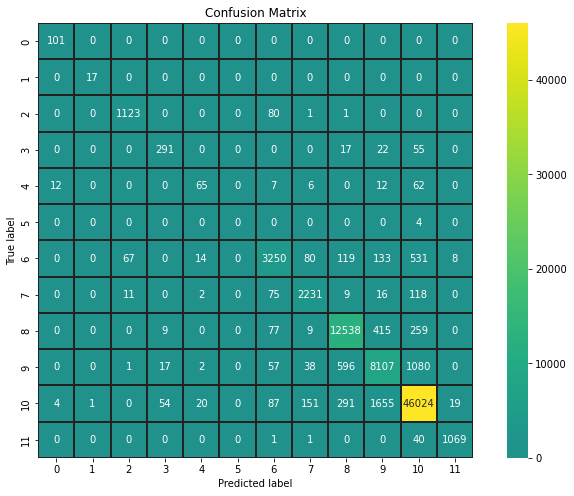

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       101
         1.0       0.94      1.00      0.97        17
         2.0       0.93      0.93      0.93      1205
         3.0       0.78      0.76      0.77       385
         4.0       0.63      0.40      0.49       164
         5.0       0.00      0.00      0.00         4
         6.0       0.89      0.77      0.83      4202
         7.0       0.89      0.91      0.90      2462
         8.0       0.92      0.94      0.93     13307
         9.0       0.78      0.82      0.80      9898
        10.0       0.96      0.95      0.95     48306
        11.0       0.98      0.96      0.97      1111

    accuracy                           0.92     81162
   macro avg       0.80      0.79      0.79     81162
weighted avg       0.92      0.92      0.92     81162



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

In [89]:
accuracy_metrics(y_CV, yhat_CV)

### Model Pipeline

In [90]:
# defing a function that wrangles a data
def wrangling(df):
    df.dropna(subset = ["X_LOC"], inplace = True)
    df.drop(columns_high_nulls, axis = "columns", inplace = True)
    data2 = df.copy()
    data2["Lithology"] = data2.FORCE_2020_LITHOFACIES_LITHOLOGY.map(lithology_keys)
    data2 = data2.query("DRHO > -0.075 and DRHO < 0.075")
    data2.drop(["RSHA", "RMED", "RDEP", "PEF"], axis="columns", inplace = True)
    data3 = data2[data2["GR"] < outlier_upper_limit(data2["GR"])]
    data3 = data3[(data3["NPHI"] < outlier_upper_limit(data3["NPHI"])) & (data3["NPHI"] > outlier_lower_limit(data3["NPHI"]))]
    data3 = data3[(data3["DTC"] < outlier_upper_limit(data3["DTC"])) & (data3["DTC"] > outlier_lower_limit(data3["DTC"]))]
    data3 = data3[(data3["SP"] < outlier_upper_limit(data3["SP"])) & (data3["SP"] > outlier_lower_limit(data3["SP"]))]

    #data3[['WELL','GROUP',"FORMATION", "Lithology"]] = data3[['WELL','GROUP',"FORMATION", "Lithology"]].astype('category')
    data3['WELL'] = data3['WELL'].map(WELLS_2int)
    data3['GROUP'] = data3['GROUP'].map(GROUPS_2int)
    data3['FORMATION'] = data3['FORMATION'].map(FORMATIONS_2int)
    data3['Lithology'] = data3['Lithology'].map(Litholgies_2int)

    data3.FORCE_2020_LITHOFACIES_CONFIDENCE.fillna(3, inplace = True)
    data4 = pd.DataFrame(imputer.fit_transform(data3), columns = data3.columns) # preserve the column nam
    data4["Lithology2"] = data4.FORCE_2020_LITHOFACIES_LITHOLOGY.map(lithology_keys)
    return data4

In [91]:
# Defining a function that wrangles the data and select the features
def preprocessing(df):
    data = wrangling(df)
    Y = data["Lithology"].values
    X = data.iloc[:,2:-4].values
    return X, Y

### Test Set

In [92]:
# Loading the datset
test = pd.read_csv("train.csv",delimiter = ';')

In [93]:
# wrangling the data and selecting X and Y
X_final, Y_final = preprocessing(test)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[IterativeImputer] Completing matrix with shape (405809, 18)
[IterativeImputer] Ending imputation round 1/20, elapsed time 11.01
[IterativeImputer] Change: 41.7554950471123, scaled tolerance: 6847.1645 
[IterativeImputer] Early stopping criterion reached.


In [94]:
# making predictions
y_hatfinal = nnmodel_predict(model3,X_final)

12682/12682 [==============================] - 19s 2ms/step


 the accuarcy of the model is 0.8896278791254013 

 the F1 score of the mdel is 0.889086891297469 

 the jaccard score of the model is 0.8098086813128313



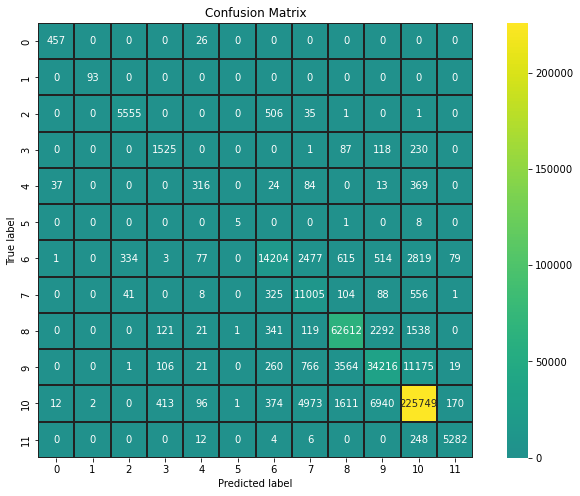

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92       483
         1.0       0.98      1.00      0.99        93
         2.0       0.94      0.91      0.92      6098
         3.0       0.70      0.78      0.74      1961
         4.0       0.55      0.37      0.45       843
         5.0       0.71      0.36      0.48        14
         6.0       0.89      0.67      0.76     21123
         7.0       0.57      0.91      0.70     12128
         8.0       0.91      0.93      0.92     67045
         9.0       0.77      0.68      0.73     50128
        10.0       0.93      0.94      0.93    240341
        11.0       0.95      0.95      0.95      5552

    accuracy                           0.89    405809
   macro avg       0.82      0.79      0.79    405809
weighted avg       0.89      0.89      0.89    405809



<Figure size 432x288 with 0 Axes>

In [95]:
# Checking the accuracy of the model
accuracy_metrics(Y_final, y_hatfinal, "confusionmatrix")

### USING RANDOM FOREST CLASSIFIER

In [96]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced_subsample')

In [97]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=50,
                       random_state=42)

### Train set

In [98]:
y_pred_train = rf_model.predict(X_train)

 the accuarcy of the model is 0.9999507156498347 

 the F1 score of the mdel is 0.9999507141853673 

 the jaccard score of the model is 0.9999014380843032



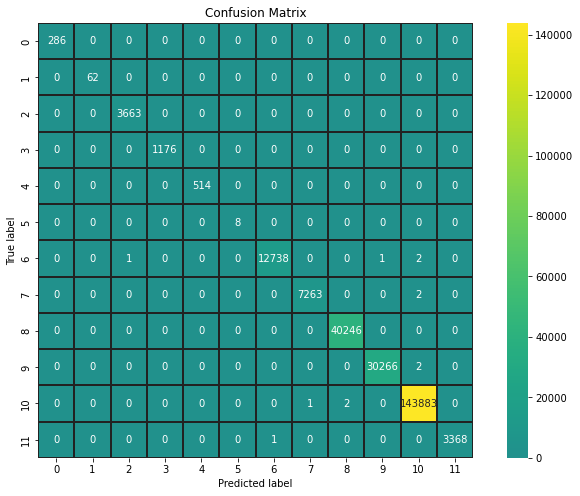

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       286
         1.0       1.00      1.00      1.00        62
         2.0       1.00      1.00      1.00      3663
         3.0       1.00      1.00      1.00      1176
         4.0       1.00      1.00      1.00       514
         5.0       1.00      1.00      1.00         8
         6.0       1.00      1.00      1.00     12742
         7.0       1.00      1.00      1.00      7265
         8.0       1.00      1.00      1.00     40246
         9.0       1.00      1.00      1.00     30268
        10.0       1.00      1.00      1.00    143886
        11.0       1.00      1.00      1.00      3369

    accuracy                           1.00    243485
   macro avg       1.00      1.00      1.00    243485
weighted avg       1.00      1.00      1.00    243485



<Figure size 432x288 with 0 Axes>

In [99]:
accuracy_metrics(y_train, y_pred_train)

### Cross Validation set

In [100]:
y_pred_test_2 = rf_model.predict(X_CV)

 the accuarcy of the model is 0.9492989329982011 

 the F1 score of the mdel is 0.9485564978866017 

 the jaccard score of the model is 0.9043381887496481



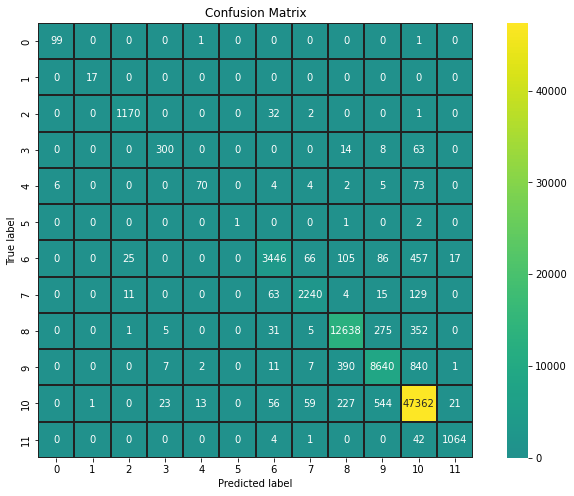

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       101
         1.0       0.94      1.00      0.97        17
         2.0       0.97      0.97      0.97      1205
         3.0       0.90      0.78      0.83       385
         4.0       0.81      0.43      0.56       164
         5.0       1.00      0.25      0.40         4
         6.0       0.94      0.82      0.88      4202
         7.0       0.94      0.91      0.92      2462
         8.0       0.94      0.95      0.95     13307
         9.0       0.90      0.87      0.89      9898
        10.0       0.96      0.98      0.97     48306
        11.0       0.96      0.96      0.96      1111

    accuracy                           0.95     81162
   macro avg       0.94      0.82      0.86     81162
weighted avg       0.95      0.95      0.95     81162



<Figure size 432x288 with 0 Axes>

In [101]:
accuracy_metrics(y_CV, y_pred_test_2)

### Test

In [102]:
y_pred_Final = rf_model.predict(X_final)

 the accuarcy of the model is 0.946228398088756 

 the F1 score of the mdel is 0.9430109792878287 

 the jaccard score of the model is 0.8971651438862341



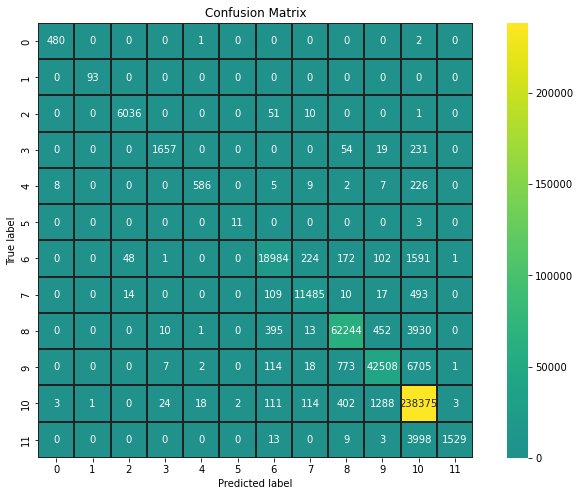

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       483
         1.0       0.99      1.00      0.99        93
         2.0       0.99      0.99      0.99      6098
         3.0       0.98      0.84      0.91      1961
         4.0       0.96      0.70      0.81       843
         5.0       0.85      0.79      0.81        14
         6.0       0.96      0.90      0.93     21123
         7.0       0.97      0.95      0.96     12128
         8.0       0.98      0.93      0.95     67045
         9.0       0.96      0.85      0.90     50128
        10.0       0.93      0.99      0.96    240341
        11.0       1.00      0.28      0.43      5552

    accuracy                           0.95    405809
   macro avg       0.96      0.85      0.89    405809
weighted avg       0.95      0.95      0.94    405809



<Figure size 432x288 with 0 Axes>

In [103]:
accuracy_metrics(Y_final, y_pred_Final)

### Saving Model

In [ ]:
#model4.save("PredictingRockLithologyModelANNFinal2")

In [ ]:
#model3.save("PredictingRockLithologyModelANNRecommended")

<a id='conclusions'></a>
## Report

The Random Forest does very well in predicting the litholgy but does poorly in predicting Tuff. And has signs high bias. The neural network models generalises better but has a lower accuracy, f1 score and jaccard score. Model 4 does better on the training set but not as much on the test set and has signs of high bias. Model 3 is the recommended model for the prediction of Lithology. with an accurracy, f1 score and jaccard score of 0.85, 0.86 and 0.76 respectively, but it performs poorly on Dolomite and Halite.

### Train Set

| Model              | Jaccard | F1-score |Accuracy |
| ------------------ | ------- | -------- | ------- |
| Model 1            | 0.82    | 0.89     | 0.90    |
| Model 2            | 0.87    | 0.93     | 0.93    |
| Model 3            | 0.88    | 0.93     | 0.93    |
| Model 4            | 0.91    | 0.95     | 0.95    |
| Random Forest Model| 1.00    | 1.00     | 1.00    |


### Cross Validation Set
| Model              | Jaccard | F1-score |Accuracy |
| ------------------ | ------- | -------- | ------- |
| Model 1            | 0.82    | 0.89     | 0.89    |
| Model 2            | 0.85    | 0.92     | 0.92    |
| Model 3            | 0.86    | 0.92     | 0.92    |
| Model 4            | 0.89    | 0.94     | 0.94    |
| Random Forest Model| 0.95    | 0.95     | 0.90    |

### Final Test set
| Model              | Jaccard | F1-score |Accuracy |
| ------------------ | ------- | -------- | ------- |
| Model 1            | 0.76    | 0.86     | 0.85    |
| Model 2            | 0.80    | 0.88     | 0.88    |
| Model 3            | 0.81    | 0.89     | 0.89    |
| Model 4            | 0.76    | 0.86     | 0.85    |
| Random Forest Model| 0.90    | 0.94     | 0.95    |



<a id='limitations'></a>
## Limitations

1. Some logs that would probably have improved the predictions of the model had missing values over 50%. These logs include SGR, ROP, DTS, DCAL, MUDWEIGHT, RMIC, ROPA, RXO. Hence these logs were not used in training the model
2. Imbalaced classes. Anhydrite, Basement, Chalk, Coal, Dolomite, Halite, Limestone, Marl, and Tuff were underrepresented 

<a id='references'></a>
## References
1. https://petrowiki.spe.org/Lithology_and_rock_type_determination
2. Data Source https://github.com/bolgebrygg/Force-2020-Machine-Learning-competition/blob/c8d01ee92c1c8e1ecba36f96cca6ea7b689338a1/lithology_competition/data/train.zip